In [1]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import unicodedata
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# key words to search for to ID brand
apple = ['iphone',
         'ipad',
         'itunes',
         'apple',
         'ios',
         'mac']
android = ['google',
           'samsung',
           'android']

# function to create new brand column based on values in tweet
def check_substring(tweet):
    # check if any of the sub strings appear individually
    apple_list = any(substring in tweet for substring in apple)
    android_list = any(substring in tweet for substring in android)

    if apple_list and android_list:
        return "both"
    elif apple_list:
        return "apple"
    elif android_list:
        return "android"
    else:
        return "unkown"


In [3]:
df_final = pd.read_csv('modified_data_apple.csv')
df_final.head()

,target,new_brand,cleaned_tweet,tokenized_tweet,cleaned_tweet_str
0,-1.0,apple,iphone hrs tweeting rise_austin dead need upgr...,"['iphone', 'hr', 'tweeting', 'rise_austin', 'd...",iphone hr tweeting rise_austin dead need upgra...
1,1.0,apple,know awesome ipadiphone app youll likely appre...,"['know', 'awesome', 'ipadiphone', 'app', 'youl...",know awesome ipadiphone app youll likely appre...
2,1.0,apple,wait ipad also sale,"['wait', 'ipad', 'also', 'sale']",wait ipad also sale
3,-1.0,apple,hope year festival crashy year iphone app,"['hope', 'year', 'festival', 'crashy', 'year',...",hope year festival crashy year iphone app
4,0.0,apple,new ipad apps speechtherapy communication show...,"['new', 'ipad', 'apps', 'speechtherapy', 'comm...",new ipad apps speechtherapy communication show...


In [4]:
X = df_final['tokenized_tweet']
y = df_final['target']

In [6]:
df_final['cleaned_tweet_str'] = df_final['cleaned_tweet_str'].astype(str)

In [7]:
#Create a dataframe of positive sentiments
df_positive = df_final[df_final['target'] == 1]

# Create a dataframe of neutral sentiments
df_neutral = df_final[df_final['target'] == 0]

# Create a dataframe of negative sentiments
df_negative = df_final[df_final['target'] == -1]

In [8]:
def generate_word_cloud(text):
    ''' Generate a wordcloud using input text'''
    
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          colormap='Oranges',
                          min_font_size=10).generate(text)

    plt.figure(figsize=(5, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)



In [9]:
def extract_prod(df, prod, str_replace):
    '''Extract a new dataframe using prod string as filter'''

    # Make a new DataFrame series using input df
    df_new = df['cleaned_tweet_str'].astype(str)

    # Filter for rows only including specific prod string
    filtered_df = df_new[df_new.str.contains(prod)]

    # Remove all substrings from str_replace list
    pattern = '|'.join(map(re.escape, str_replace))
    filtered_df = filtered_df.str.replace(pattern, '')

    # Return filtered_df of tweets only related to input prod string
    return filtered_df

In [10]:
# Checking to see if extract_prod is working properly
# Return a df of tweets related to ipads in positive sentiments df
df_ipad = extract_prod(df_positive, 'ipad', apple)

In [11]:

def prod_wordcloud(df_tweet, product, list_remove):
    ''' Takes in df_tweet, filters by input product string, then creates
        positive, negative, and neutral wordclouds for product'''
    
    # Convert product string to title for visualization purposes
    prod = product.title()

    # Creating dataframes for positive, neutral, and negative sentiments
    df_pos = df_final[df_final['target'] == 1]
    df_neut = df_final[df_final['target'] == 0]
    df_neg = df_final[df_final['target'] == -1]

    # Extracting tweets by input product for positive sentiment dataframe
    df_posit = extract_prod(df_pos, product, list_remove)

    # Join all the tweets together
    text_positive = ' '.join(df_posit)

    # Generate wordcloud for positive sentiments for input product
    generate_word_cloud(text_positive)
    plt.title(f"Word Cloud - {prod} Positive Sentiment")
    plt.show()

    # Extracting tweets by input product for negative sentiment dataframe
    df_negat = extract_prod(df_neg, product, list_remove)

    # Join all the tweets together
    text_negative = ' '.join(df_negat)

    # Generate wordcloud for negative sentiments for input product
    generate_word_cloud(text_negative)
    plt.title(f"Word Cloud - {prod} Negative Sentiment")
    plt.show()

    # Extracting tweets by input product for neutral sentiment dataframe
    df_ne = extract_prod(df_neut, product, list_remove)

    # Join all the tweets together
    text_neutral = ' '.join(df_ne)

    # Generate wordcloud for neutral sentiments for input product
    generate_word_cloud(text_neutral)
    plt.title(f"Word Cloud - {prod} Neutral Sentiment")
    plt.show()

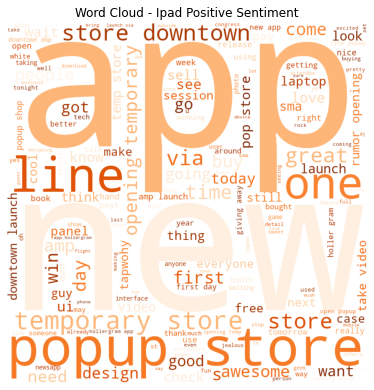

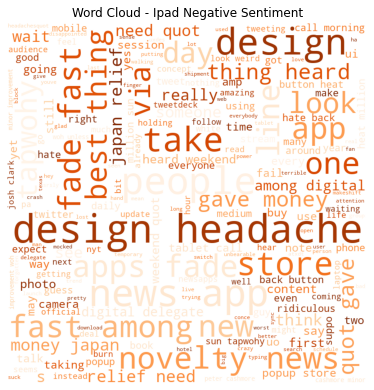

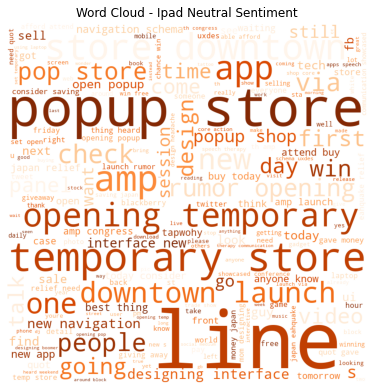

In [14]:
# Testing prod_wordcloud function for ipad products
prod_wordcloud(df_final, 'ipad', apple)

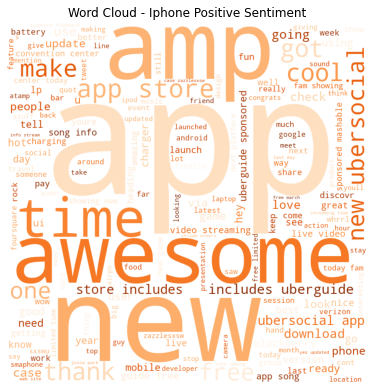

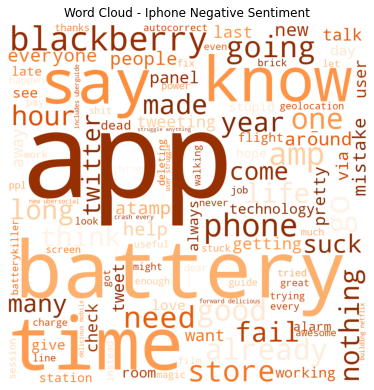

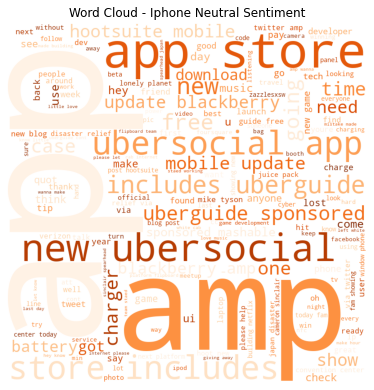

In [13]:
# Testing prod_wordcloud function for iphone products
prod_wordcloud(df_final, 'iphone', apple)